# Marketing Campaign Experiment for a Portugese Banking Institution

This document outlines an exploration of a dataset from a direct marketing campaign of a Portugese banking institution. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('bank-full.csv', sep=';')

First, let's look at the variable we are most intersted in; whether or not a recipient of the campaign subscribed a term deposit.

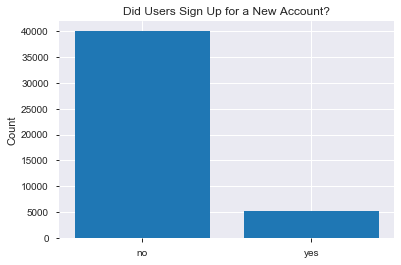

In [20]:
plt.bar(df.y.value_counts().index,df.y.value_counts())
plt.title('Did Users Sign Up for a New Account?')
plt.ylabel('Count')
plt.show()

We have about 5,000 who signed up, and around 40,000 who did not. Next, let's see if there is any difference across the age of customers.

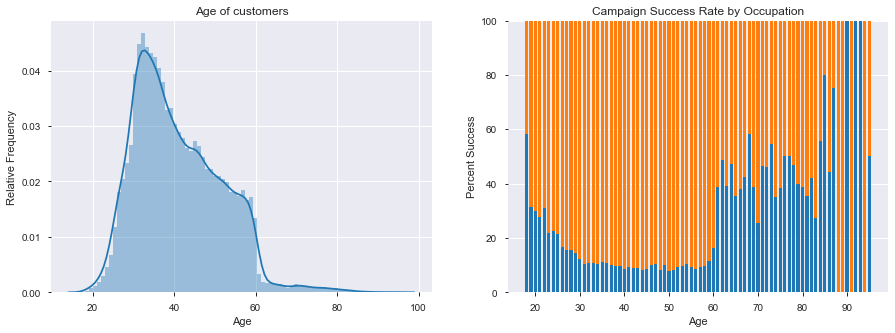

In [27]:
df['y_bool'] = df['y'] == 'yes'

yes_by_age = pd.DataFrame(columns=['Age','Percent Yes','Percent No'])

for a in range(18,96):
    df_age = df[df.age==a]
    try:
        p = sum(df_age.y_bool)/len(df_age)
    except:
        p = 0
    yes_by_age = yes_by_age.append({'Age':a,'Percent Yes':p*100, 'Percent No':100-p*100},ignore_index=True)

plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
sns.distplot(df.age, bins=78)
plt.title('Age of customers')
plt.xlabel('Age')
plt.ylabel('Relative Frequency')

plt.subplot(1,2,2)   
    
age = yes_by_age['Age']
pct_y = yes_by_age['Percent Yes']
pct_n = yes_by_age['Percent No']
plt.title('Campaign Success Rate by Occupation')
plt.xlabel('Age')
plt.ylabel('Percent Success')

plt.bar(age, pct_y, width=.7)
plt.bar(age, pct_n, bottom=pct_y, width=.7)

plt.show()

We see fairly high rates among people in their late teens and early twenties. This makes sense, as many of these customers could likely be signing up for their first bank accounts, or are relatively early in their financial life. It stabilizes around age 30, and is relatively constant until about age 60. There is also a steep dropoff in frequency at the same age. Normally, I would wonder if the variable was topcoded for a certain segment of the sample. However, the spike in rate at the same age as the dropoff in frequency leads me to believe that the bank may target a different type of customers aged 60 and up. 

Next, a profiling report is printed to get a better overview of all the variables in the data set.

In [22]:
import pandas_profiling
df.profile_report(style={'full_width':True})

The main report of interest is the correlation section. Unfortunately, most variables have a fairly low correlation with our variable of interest (y, or y_bool). Duration and previous outcome are the most correlated variables. Duration makes sense, since longer calls would seem to signal openness to marketing campaign and the products being offered. Previous outcome would seem to imply that customers who opened accounts at the influence of a marketing campaign in the past are more likely to do so in the future. Targeting repeat customers seems a little too simple, so the next section digs into the occupations of our population to see if there is anything more interesting to be found.

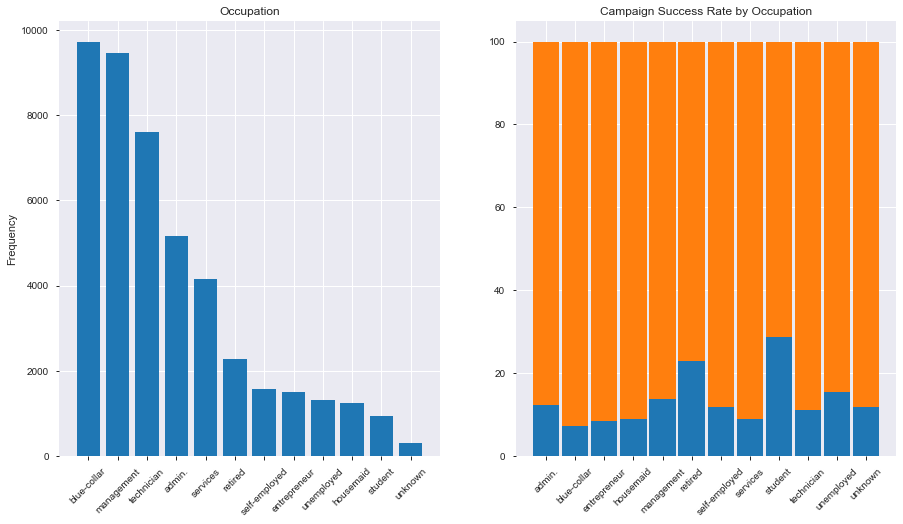

In [23]:
total = df.job.value_counts()
yes = df[df.y=='yes'].job.value_counts()
no = df[df.y=='no'].job.value_counts()
pct_yes = 100*yes/total
pct_no = 100*no/total

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig=plt.bar(total.index, total)
plt.xticks(rotation=45)
plt.title('Occupation')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.bar(pct_yes.index, pct_yes, width=.9)
plt.bar(pct_yes.index, pct_no, bottom=pct_yes, width=.9)
plt.xticks(rotation=45)
plt.title('Campaign Success Rate by Occupation')

plt.show()

Blue collar workers are the largest group, but have what looks like the lowest success rate of any occupation group. It's possible that there is a confounding variable. The next two sections look at the distribution of age by occupation (against two occupations with moderately high success rates), then splits the population into different age groups.

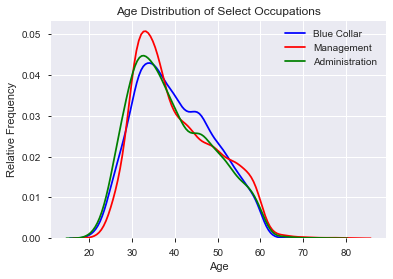

In [24]:
sns.distplot(df[df.job=='blue-collar'].age, bins=15, color='blue', label='Blue Collar', hist=False)
sns.distplot(df[df.job=='management'].age, bins=15, color='red', label='Management', hist=False)
sns.distplot(df[df.job=='admin.'].age, bins=15, color='green', label='Administration', hist=False)
plt.title('Age Distribution of Select Occupations')
plt.xlabel('Age')
plt.ylabel('Relative Frequency')

plt.legend()
plt.show()

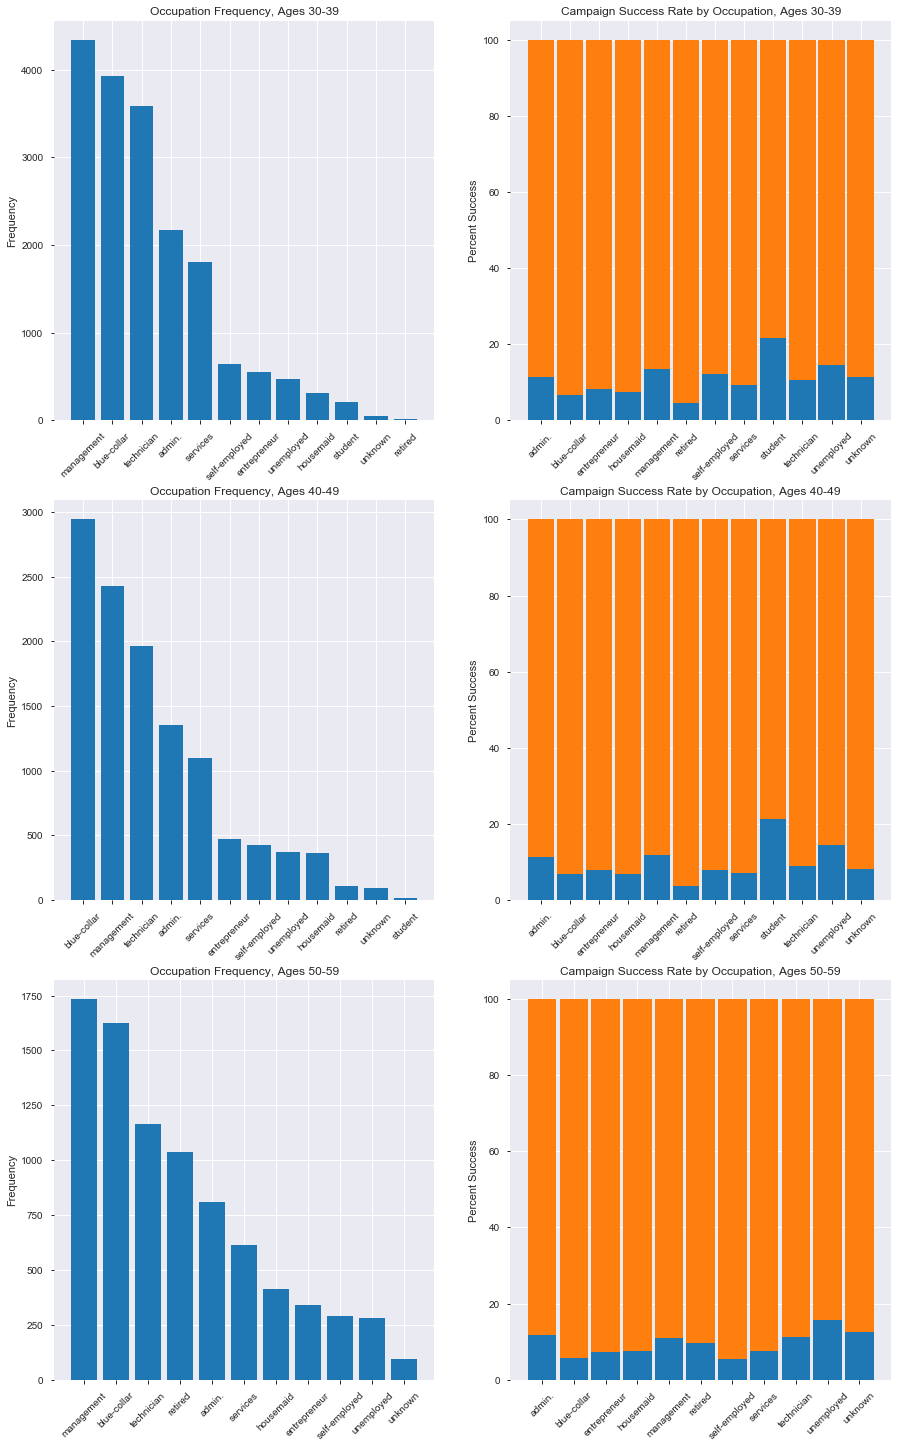

In [25]:
df_thirties = df[(df.age >= 30) & (df.age < 40)]
df_forties = df[(df.age >= 40) & (df.age < 50)]
df_fifties = df[(df.age >= 50) & (df.age < 60)]

df_list = [df_thirties, df_forties, df_fifties]

plt.figure(figsize=(15,25))

agelist = ['30-39', '40-49', '50-59']

for i in range(3):
    new_df = df_list[i]
    total = new_df.job.value_counts()
    yes = new_df[new_df.y=='yes'].job.value_counts()
    no = new_df[new_df.y=='no'].job.value_counts()
    pct_yes = 100*yes/total
    pct_no = 100-pct_yes
    plt.subplot(3,2,1+2*i)
    plt.title('Occupation Frequency, Ages {}'.format(agelist[i]))
    plt.ylabel('Frequency')
    fig=plt.bar(total.index, total)
    plt.xticks(rotation=45)
    plt.subplot(3,2,2+2*i)
    plt.title('Campaign Success Rate by Occupation, Ages {}'.format(agelist[i]))
    plt.ylabel('Percent Success')
    plt.bar(pct_yes.index, pct_yes, width=.9)
    plt.bar(pct_yes.index, pct_no, bottom=pct_yes, width=.9)
    plt.xticks(rotation=45)

plt.show()

# Note: I'd like to figure out how to reorder bar charts so that the order 
# of the bars of the charts on the right is the same as the charts on the 
# left. I feel like this would enhance readability.

While the distribution of blue-collar workers does skew slightly older, these results suggest the disparity is not simply due to demographic differences. Even within age group, among workers in their twenties, thirties, and forties, the bank's marketing campaign is having limited success with blue-collar workers. As this is one of the largest groups in our sample, lessening this disparity could have a serious effect on the bank's bottom line.

We've asked the (fictional) marketing department to come up with a campaign targeting blue collar workers. The experiment to test whether this campaign appeals more to the target demographic will be conducted as follows:

The bank campaign reaches out to approximately 100 blue collar workers every week. For the first month, the bank will test the new campaign on approximately 50 recipients, compared to 350 in our control group. Our control group will receive calls following "Campaign 1," the most successful campaign so far among those with a sufficient sample size. 

Assuming no red flags are raised in the first month, stage two of testing will begin in month 2. Over the next 3 months, callers will randomize between using "campaign 1," and our new, "blue-collar-focused," campaign when calling blue-collar workers. This should result in at least 500 recipients in both our test and control group. 

At the end of the test period, we will compare the two groups to see if the new campaign was successful. Demographic variables, such as age, income, and previous accounts should all be examined to ensure there is no substantial differences between the test and control groups. Assuming that is the case, a t-test will be performed on the test and control groups to see if the rate of success is significantly different between the two groups. If the test group has a higher rate of conversion, and our t-statistic is sufficiently high (such that our p-value is below 0.05), then we can conclude that our new marketing campaign was a success!